## Exercise Interpolation

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

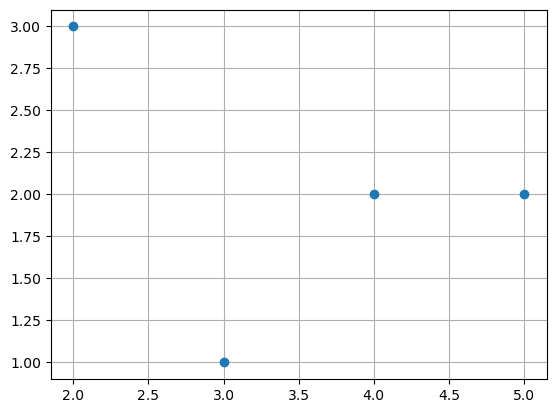

In [18]:
xs = np.array([2, 3, 4, 5])
ys = np.array([3, 1, 2, 2])
plt.plot(xs, ys, 'o', label='Data Points')
plt.grid()

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

3


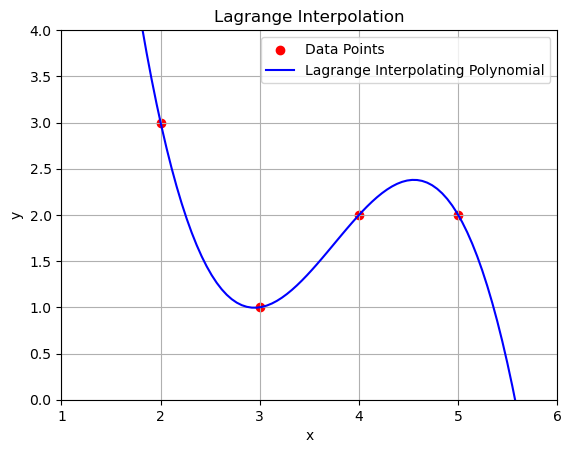

In [ ]:
def diff_fn(x_n):
    def make_diff(x):
        return x - x_n
    return make_diff

#print(diff_fn(2)(5))  # should be 3

def p(n, x):
    product = 1
    for i, x_n in enumerate(xs):
        if n != i:
            product *= diff_fn(x_n)(x)
    return product

def L(n, x):
    return p(n, x) / p(n, xs[n])

def lagrange(x):
    total = 0
    for n, y_n in enumerate(ys):
        total += y_n * L(n, x)
    return total

x_dense = np.linspace(1, 6, 100)
y_dense = lagrange(x_dense)

plt.scatter(xs, ys, label='Data Points', color='red')
plt.plot(x_dense, y_dense, label='Lagrange Interpolating Polynomial', color='blue')
plt.xlim(1, 6)
plt.ylim(0, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

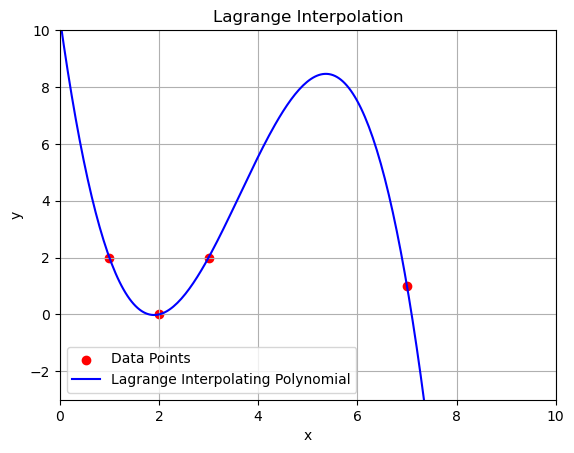

In [34]:
xs = np.array([1, 2, 3, 7])
ys = np.array([2, 0, 2, 1])
x_dense = np.linspace(min(xs)-1, max(xs)+1, 200)
y_dense = lagrange(x_dense)

plt.scatter(xs, ys, label='Data Points', color='red')
plt.plot(x_dense, y_dense, label='Lagrange Interpolating Polynomial', color='blue')
plt.xlim(0, 10)
plt.ylim(-3, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

4) Write a function `lagrange(x)` which compute the lagrange polynomial given the list of x values in xs and y values in ys.

`lagrange(1.5)`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [35]:
print(lagrange(1.5))

0.346875


5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

6) Plot lagrange polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your lagrange is plotte with at least 100 points.

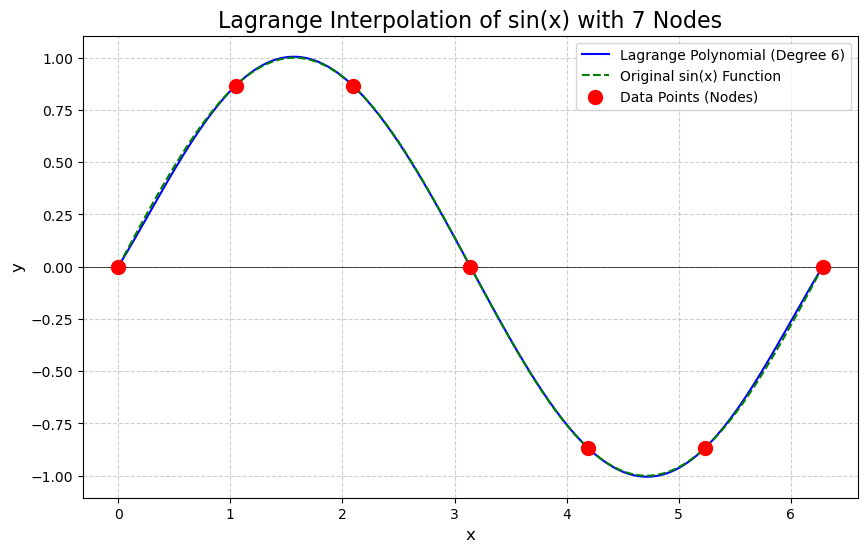

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 0. Another example of implementation of Lagrange polynomial interpolation
def lagrange_polynomial(x_nodes, y_nodes, x_eval):
    """
    Manually calculates the value of a Lagrange interpolating polynomial at a given point.
    """
    n = len(x_nodes)
    polynomial_result = 0.0

    for i in range(n):
        basis_poly_i = 1.0
        for j in range(n):
            if i != j:
                basis_poly_i *= (x_eval - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        polynomial_result += y_nodes[i] * basis_poly_i

    return polynomial_result

# 1. Define the exact nodes you requested
x_nodes = np.linspace(0, 2 * np.pi, 7)
y_nodes = np.sin(x_nodes)

# 2. Create a dense range of x-values for plotting a smooth curve
x_dense = np.linspace(0, 2 * np.pi, 1000)

# 3. Calculate the polynomial's y-values for the dense x-range
y_dense = [lagrange_polynomial(x_nodes, y_nodes, x) for x in x_dense]

# 4. Plot the results
plt.figure(figsize=(10, 6))
# Plot the smooth Lagrange polynomial
plt.plot(x_dense, y_dense, label='Lagrange Polynomial (Degree 6)', color='blue')
# Plot the original sine wave for comparison
plt.plot(x_dense, np.sin(x_dense), label='Original sin(x) Function', color='green', linestyle='--')
# Plot the 7 nodes the polynomial must pass through
plt.scatter(x_nodes, y_nodes, color='red', s=100, zorder=5, label='Data Points (Nodes)')

plt.title('Lagrange Interpolation of sin(x) with 7 Nodes', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(200*x)$ along with those 11 points. Note the 200. Then plot lagrange polynomial for these points.

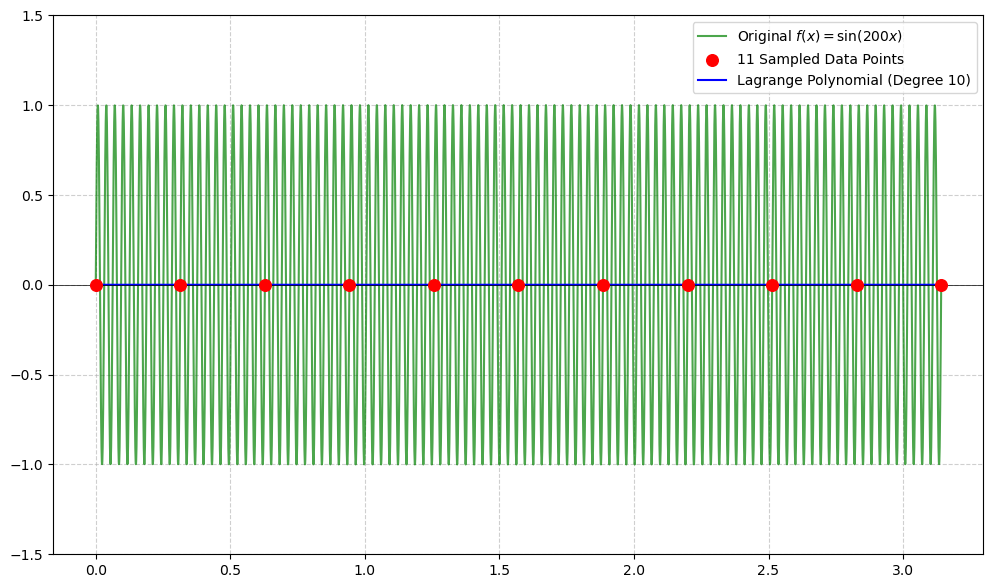

In [ ]:
def f(x):
    return np.sin(200 * x)

x_nodes = np.linspace(0, np.pi, 11)
y_nodes = f(x_nodes)
x_dense = np.linspace(0, np.pi, 5000) 
y_dense = [lagrange_polynomial(x_nodes, y_nodes, x) for x in x_dense]

plt.figure(figsize=(12, 7))
plt.plot(x_dense, f(x_dense), label='Original $f(x) = \\sin(200x)$', color='green', alpha=0.7)
plt.scatter(x_nodes, y_nodes, color='red', s=70, zorder=5, label='11 Sampled Data Points')
plt.plot(x_dense, y_dense, label='Lagrange Polynomial (Degree 10)', color='blue', linestyle='-')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.ylim(-1.5, 1.5) 
plt.show()

8) Does it pass through all the point? Does it look like the original function?